In [15]:
import numpy as np
from pandas import IndexSlice as idx
from matplotlib import pyplot as plt

In [16]:
theta=np.linspace(0, 2*np.pi, num=361)
Total_Temp_var=np.where(theta<=180,T1+(T2-T1)*theta/(180),T2-(T2-T1)*(theta-180)/(180))

x_coord=np.cos(np.radians(theta))
y_coord=Total_Temp_var-x_coord

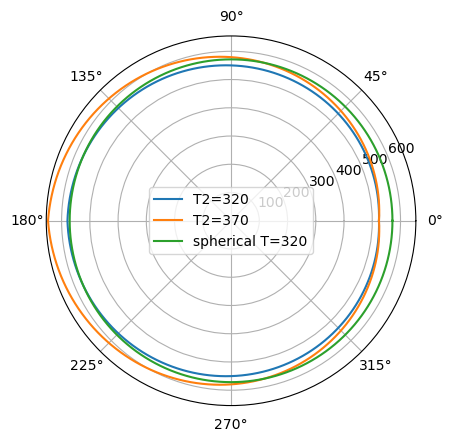

In [17]:
T1=270
T2=320

#r = np.arange(0, 2, 0.01)
theta=np.linspace(0, 2*np.pi, num=361)
r=(39.7)/(0.07275*(1-0.002*(np.where(theta<=np.pi,T1+(T2-T1)*theta/(np.pi),T2-(T2-T1)*(theta-np.pi)/(np.pi))-291)))
#theta = 2 * np.pi * r

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, r,label='T2=320')

T1=270
T2=370

#r = np.arange(0, 2, 0.01)
theta=np.linspace(0, 2*np.pi, num=361)
r=(39.7)/(0.07275*(1-0.002*(np.where(theta<=np.pi,T1+(T2-T1)*theta/(np.pi),T2-(T2-T1)*(theta-np.pi)/(np.pi))-291)))

ax.plot(theta, r,label='T2=370')
R=3.5e-3
r=np.where(theta<=np.pi,2/R,2/R)

ax.plot(theta, r,label='spherical T=320')
ax.legend()
#ax.set_rmax(550)
#ax.set_rticks([0.05, 0.1, 0.15, 0.2])  # Less radial ticks
#ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
#ax.grid(True)

#ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()

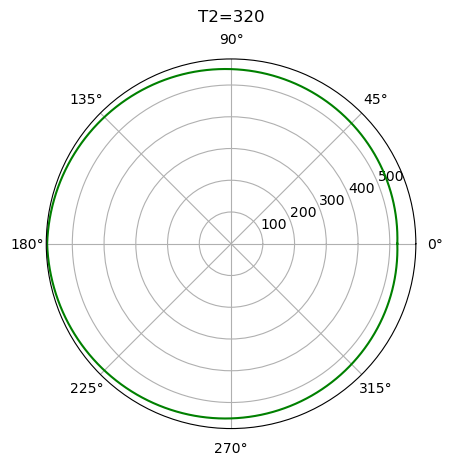

In [6]:
T1=270
T2=320

#r = np.arange(0, 2, 0.01)
theta=np.linspace(0, 2*np.pi, num=361)
r=(39.7)/(0.07275*(1-0.002*(np.where(theta<=np.pi,T1+(T2-T1)*theta/(np.pi),T2-(T2-T1)*(theta-np.pi)/(np.pi))-291)))
#theta = 2 * np.pi * r

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, r,c='green')
#ax.set_rmax(600)
#ax.set_rticks([0.05, 0.1, 0.15, 0.2])  # Less radial ticks
#ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
#ax.grid(True)

ax.set_title(f"T2={T2}", va='bottom')
plt.show()

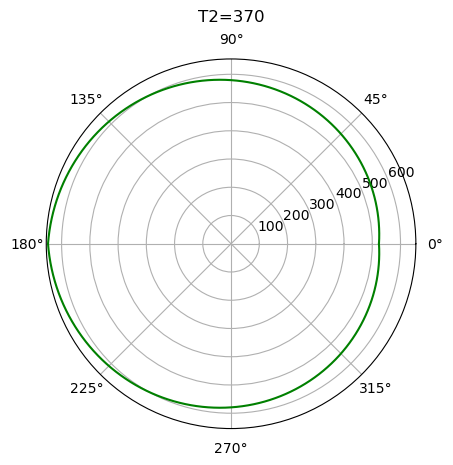

In [13]:
T1=270
T2=370

#r = np.arange(0, 2, 0.01)
theta=np.linspace(0, 2*np.pi, num=361)
r=(39.7)/(0.07275*(1-0.002*(np.where(theta<=np.pi,T1+(T2-T1)*theta/(np.pi),T2-(T2-T1)*(theta-np.pi)/(np.pi))-291)))
#theta = 2 * np.pi * r

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, r,c='green')
#ax.set_rmax(600)
#ax.set_rticks([0.05, 0.1, 0.15, 0.2])  # Less radial ticks
#ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
#ax.grid(True)

ax.set_title(f"T2={T2}", va='bottom')
plt.show()

In [14]:
np.max(r)

648.1050681163325

In [20]:
import pandas as pd

In [21]:
plot=pd.read_csv('table.csv',header=1)
plot=plot[3:]
plot=plot[[ 'Total Cores', "Core's Availability Factor", 'Cores Available',
       'Nodes Processable by Cores', 'Total Processable Nodes',
       'Bubble Percentage', 'Total Volume of Bubble',
       'Nodes Across dia of Bubble', 'Number of Bubbles']]
plot=plot.rename(columns={"Core's Availability Factor":'Cores Availability Factor'})
plot=plot.rename(columns={"Nodes Processable by Cores":'Nodes_Processable_by_Cores'})
plot=plot.reset_index(drop=True)
plot['Total Cores']=8730112
plot=plot.fillna(method='ffill')
plot=plot[~plot.Nodes_Processable_by_Cores.str.contains('This value is not influenced by av')]
plot=plot[~plot.Nodes_Processable_by_Cores.str.contains('repeat')]
plot=plot.reset_index(drop=True)

In [61]:
grouped_table=plot.groupby(['Total Cores','Cores Availability Factor','Cores Available','Nodes_Processable_by_Cores','Total Processable Nodes','Bubble Percentage','Total Volume of Bubble','Nodes Across dia of Bubble'])[['Number of Bubbles']].sum()

In [22]:
plot2=plot[['Cores Availability Factor','Nodes_Processable_by_Cores','Bubble Percentage','Nodes Across dia of Bubble','Number of Bubbles']].reset_index(drop=True)

plot2['Cores Availability Factor']=plot2['Cores Availability Factor'].apply(lambda x: float(x))
plot2['Nodes_Processable_by_Cores']=plot2['Nodes_Processable_by_Cores'].apply(lambda x: float(x.replace(',','')))

plot2['Bubble Percentage']=plot2['Bubble Percentage'].apply(lambda x: float(x))

plot2['Nodes Across dia of Bubble']=plot2['Nodes Across dia of Bubble'].apply(lambda x: float(x))

plot2['Number of Bubbles']=plot2['Number of Bubbles'].apply(lambda x: float(x.replace(',','')))





In [25]:
plot2.to_csv('parameters.csv',index=False)

In [185]:
grouped_plot1=plot2.groupby(['Cores Availability Factor','Bubble Percentage','Nodes Across dia of Bubble'],group_keys=True)[['Number of Bubbles']].apply(lambda x: x)
grouped_plot2=plot2.groupby(['Cores Availability Factor','Nodes_Processable_by_Cores','Bubble Percentage','Nodes Across dia of Bubble'],group_keys=True)[['Number of Bubbles']].sum()



In [129]:
grouped_plot2['Number of Bubbles']=grouped_plot1['Number of Bubbles']

In [100]:
grouped_plot2['Number of Bubbles']=grouped_plot1['Number of Bubbles']

In [192]:
grouped_plot2.columns

Index(['Number of Bubbles'], dtype='object')

In [194]:
plot2[(plot2['Cores Availability Factor']==0.25)&(plot2['Bubble Percentage']==0.02)&(plot2['Nodes_Processable_by_Cores']==2048)]

,Cores Availability Factor,Nodes_Processable_by_Cores,Bubble Percentage,Nodes Across dia of Bubble,Number of Bubbles
0,0.25,2048.0,0.02,10.0,170734.0
1,0.25,2048.0,0.02,20.0,21342.0
2,0.25,2048.0,0.02,30.0,6323.0


In [ ]:
plot2.pivot(index="Nodes Across dia of Bubble", columns=["Cores Availability Factor", "Nodes_Processable_by_Cores"],values="Number of Bubbles")



In [274]:
table = pd.pivot_table(plot2, values='Number of Bubbles', index=['Cores Availability Factor'],
                    columns=['Bubble Percentage','Nodes_Processable_by_Cores','Nodes Across dia of Bubble'], aggfunc=np.sum)

In [275]:
table.to_csv()

Bubble Percentage               0.02                                         \
Nodes_Processable_by_Cores    2048.0                       4096.0             
Nodes Across dia of Bubble      10.0     20.0     30.0       10.0      20.0   
Cores Availability Factor                                                     
0.25                        170734.0  21342.0   6323.0   341469.0   42684.0   
0.50                        341469.0  42684.0  12647.0   682938.0   85367.0   
0.75                        512203.0  64025.0  18970.0  1024407.0  128051.0   
1.00                        682938.0  85367.0  25294.0  1365876.0  170734.0   

Bubble Percentage                                                        0.04  \
Nodes_Processable_by_Cores              8192.0                         2048.0   
Nodes Across dia of Bubble     30.0       10.0      20.0      30.0       10.0   
Cores Availability Factor                                                       
0.25                        12647.0   682938.0   85367.0   25294.0   341469.0   
0.50                        25294.0  1365876.0  170734.0   50588.0   682938.0   
0.75                        37941.0  2048813.0  256102.0   75882.0  1024407.0   
1.00                        50588.0  2731751.0  341469.0  101176.0  1365876.0   

Bubble Percentage           ...                 0.08                      \
Nodes_Processable_by_Cores  ...    8192.0     2048.0                       
Nodes Across dia of Bubble  ...      30.0       10.0      20.0      30.0   
Cores Availability Factor   ...                                            
0.25                        ...   50588.0   682938.0   85367.0   25294.0   
0.50                        ...  101176.0  1365876.0  170734.0   50588.0   
0.75                        ...  151764.0  2048813.0  256102.0   75882.0   
1.00                        ...  202352.0  2731751.0  341469.0  101176.0   

Bubble Percentage                                                      \
Nodes_Processable_by_Cores     4096.0                          8192.0   
Nodes Across dia of Bubble       10.0      20.0      30.0        10.0   
Cores Availability Factor                                               
0.25                        1365876.0  170734.0   50588.0   2731751.0   
0.50                        2731751.0  341469.0  101176.0   5463502.0   
0.75                        4097627.0  512203.0  151764.0   8195253.0   
1.00                        5463502.0  682938.0  202352.0  10927005.0   

Bubble Percentage                                
Nodes_Processable_by_Cores                       
Nodes Across dia of Bubble       20.0      30.0  
Cores Availability Factor                        
0.25                         341469.0  101176.0  
0.50                         682938.0  202352.0  
0.75                        1024407.0  303528.0  
1.00                        1365876.0  404704.0  

[4 rows x 27 columns]

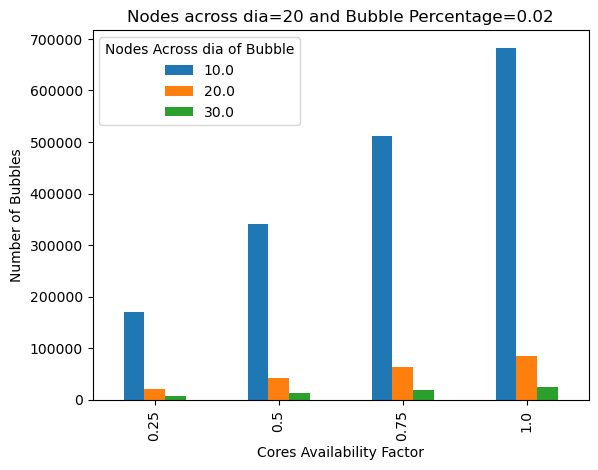

In [276]:
fig=table[0.02,2048].plot(kind='bar',ylabel='Number of Bubbles',title='Nodes across dia=20 and Bubble Percentage=0.02')
plt.show()

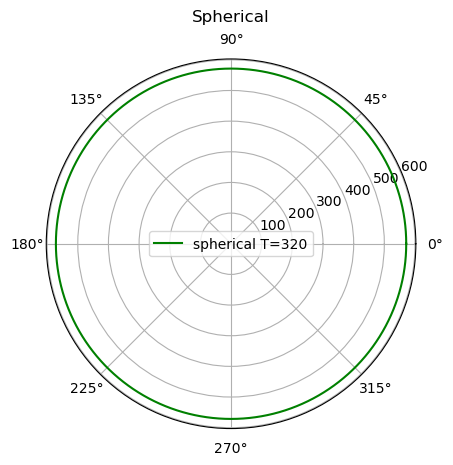

In [10]:

R=3.5e-3
r=np.where(theta<=np.pi,2/R,2/R)
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, r,label='spherical T=320',c='green')
ax.legend()
#ax.set_rmax(550)
#ax.set_rticks([0.05, 0.1, 0.15, 0.2])  # Less radial ticks
#ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
#ax.grid(True)

ax.set_title("Spherical", va='bottom')
plt.show()